In [17]:
import numpy as np

data = [
    ['Sunny', 'Hot', 'High', 'Weak', 'No'],
    ['Sunny', 'Hot', 'High', 'Strong', 'No'],
    ['Overcast', 'Hot', 'High', 'Weak', 'Yes'],
    ['Rainy', 'Mild', 'High', 'Weak', 'Yes'],
    ['Rainy', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Rainy', 'Cool', 'Normal', 'Strong', 'No'],
    ['Overcast', 'Cool', 'Normal', 'Strong', 'Yes'],
    ['Sunny', 'Mild', 'High', 'Weak', 'No'],
    ['Sunny', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Rainy', 'Mild', 'Normal', 'Weak', 'Yes'],
    ['Sunny', 'Mild', 'Normal', 'Strong', 'Yes'],
    ['Overcast', 'Mild', 'High', 'Strong', 'Yes'],
    ['Overcast', 'Hot', 'Normal', 'Weak', 'Yes'],
    ['Rainy', 'Mild', 'High', 'Strong', 'No']
]

def train_test_split(data, split_ratio=0.7):
    np.random.shuffle(data)
    train_size = int(len(data) * split_ratio)
    return data[:train_size], data[train_size:]

def accuracy(y_true, y_pred):
    if len(y_true) == 0 or len(y_pred) == 0:
        return 0.0
    correct = sum(1 for yt, yp in zip(y_true, y_pred) if yt == yp)
    return correct / len(y_true)

def build_tree(data, max_depth=5, depth=0):
    if max_depth == 0 or len(data) == 0:
        return None
    counts = {}
    for sample in data:
        label = sample[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    majority_label = max(counts, key=counts.get)
    accuracy_node = counts.get(majority_label, 0) / len(data)
    tree = {'accuracy': accuracy_node}
    tree['prediction'] = majority_label
    if depth < max_depth:
        for feature in range(len(data[0]) - 1):
            unique_values = np.unique([sample[feature] for sample in data])
            for value in unique_values:
                subset = [sample for sample in data if sample[feature] == value]
                tree[(feature, value)] = build_tree(subset, max_depth, depth + 1)
    return tree

def predict(tree, sample):
    while 'prediction' not in tree:
        feature, value = next(key for key in tree.keys() if isinstance(key, tuple) and key[0] == sample[key[0]])
        tree = tree[(feature, value)]
    return tree['prediction']

def bootstrap(data, n_samples):
    indices = np.random.randint(0, len(data), size=n_samples)
    return [data[i] for i in indices]


In [18]:
def random_forest(data, n_trees=10, max_depth=5):
    trees = []
    accuracies = []
    for i in range(n_trees):
        sample = bootstrap(data, len(data))
        tree = build_tree(sample, max_depth)
        trees.append(tree)
        y_true = [sample[-1] for sample in data]
        y_pred = [predict(tree, sample) for sample in data]
        tree_acc = accuracy(y_true, y_pred)
        accuracies.append(tree_acc)
        print(f"Decision Tree {i+1}:")
        print_tree_structure(tree, depth=0)
        print(f"Accuracy on Training Data: {tree_acc:.2f}")
        test_y_true = [sample[-1] for sample in test_data]
        test_y_pred = [predict(tree, sample) for sample in test_data]
        test_acc = accuracy(test_y_true, test_y_pred)
        print(f"Accuracy on Test Data: {test_acc:.2f}")
        print("------------------------------")
    return trees, accuracies


In [12]:
def print_tree_structure(tree, depth=0):
    if 'prediction' in tree:
        print(f"{'  ' * depth} Prediction: {tree['prediction']} (Accuracy: {tree['accuracy']:.2f})")
    for key, value in tree.items():
        if isinstance(key, tuple):
            print(f"{'  ' * depth} |-- Feature {key[0]} == {key[1]}")
            print_tree_structure(value, depth + 1)


In [13]:

train_data, test_data = train_test_split(data)
forest, tree_accuracies = random_forest(train_data)
avg_accuracy = np.mean(tree_accuracies)
print(f"Average Accuracy of the Random Forest: {avg_accuracy:.2f}")


Decision Tree 1:
 Prediction: Yes (Accuracy: 0.89)
 |-- Feature 0 == Overcast
   Prediction: Yes (Accuracy: 1.00)
   |-- Feature 0 == Overcast
     Prediction: Yes (Accuracy: 1.00)
     |-- Feature 0 == Overcast
       Prediction: Yes (Accuracy: 1.00)
       |-- Feature 0 == Overcast
         Prediction: Yes (Accuracy: 1.00)
         |-- Feature 0 == Overcast
           Prediction: Yes (Accuracy: 1.00)
         |-- Feature 1 == Hot
           Prediction: Yes (Accuracy: 1.00)
         |-- Feature 1 == Mild
           Prediction: Yes (Accuracy: 1.00)
         |-- Feature 2 == High
           Prediction: Yes (Accuracy: 1.00)
         |-- Feature 3 == Strong
           Prediction: Yes (Accuracy: 1.00)
         |-- Feature 3 == Weak
           Prediction: Yes (Accuracy: 1.00)
       |-- Feature 1 == Hot
         Prediction: Yes (Accuracy: 1.00)
         |-- Feature 0 == Overcast
           Prediction: Yes (Accuracy: 1.00)
         |-- Feature 1 == Hot
           Prediction: Yes (Accuracy: 1

Decision Tree 3:
 Prediction: Yes (Accuracy: 0.67)
 |-- Feature 0 == Overcast
   Prediction: Yes (Accuracy: 1.00)
   |-- Feature 0 == Overcast
     Prediction: Yes (Accuracy: 1.00)
     |-- Feature 0 == Overcast
       Prediction: Yes (Accuracy: 1.00)
       |-- Feature 0 == Overcast
         Prediction: Yes (Accuracy: 1.00)
         |-- Feature 0 == Overcast
           Prediction: Yes (Accuracy: 1.00)
         |-- Feature 1 == Mild
           Prediction: Yes (Accuracy: 1.00)
         |-- Feature 2 == High
           Prediction: Yes (Accuracy: 1.00)
         |-- Feature 3 == Strong
           Prediction: Yes (Accuracy: 1.00)
       |-- Feature 1 == Mild
         Prediction: Yes (Accuracy: 1.00)
         |-- Feature 0 == Overcast
           Prediction: Yes (Accuracy: 1.00)
         |-- Feature 1 == Mild
           Prediction: Yes (Accuracy: 1.00)
         |-- Feature 2 == High
           Prediction: Yes (Accuracy: 1.00)
         |-- Feature 3 == Strong
           Prediction: Yes (Accura

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Decision Tree 1: Accuracy on Training Data: 0.56
------------------------------
Decision Tree 2: Accuracy on Training Data: 0.44
------------------------------
Decision Tree 3: Accuracy on Training Data: 0.56
------------------------------
Decision Tree 4: Accuracy on Training Data: 0.56
------------------------------
Decision Tree 5: Accuracy on Training Data: 0.44
------------------------------
Decision Tree 6: Accuracy on Training Data: 0.56
------------------------------
Decision Tree 7: Accuracy on Training Data: 0.56
------------------------------
Decision Tree 8: Accuracy on Training Data: 0.56
------------------------------
Decision Tree 9: Accuracy on Training Data: 0.56
------------------------------
Decision Tree 10: Accuracy on Training Data: 0.44
------------------------------


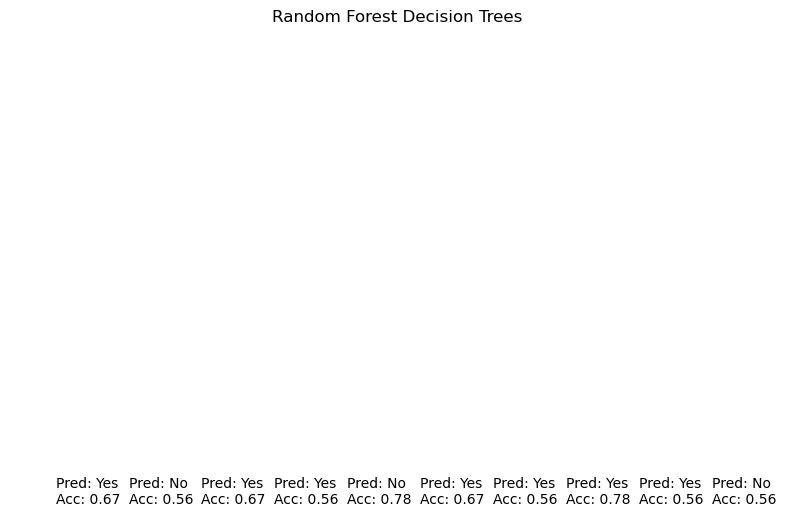

In [20]:
import numpy as np
import matplotlib.pyplot as plt

data = [
    ['Sunny', 'Hot', 'High', 'Weak', 'No'],
    ['Sunny', 'Hot', 'High', 'Strong', 'No'],
    ['Overcast', 'Hot', 'High', 'Weak', 'Yes'],
    ['Rainy', 'Mild', 'High', 'Weak', 'Yes'],
    ['Rainy', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Rainy', 'Cool', 'Normal', 'Strong', 'No'],
    ['Overcast', 'Cool', 'Normal', 'Strong', 'Yes'],
    ['Sunny', 'Mild', 'High', 'Weak', 'No'],
    ['Sunny', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Rainy', 'Mild', 'Normal', 'Weak', 'Yes'],
    ['Sunny', 'Mild', 'Normal', 'Strong', 'Yes'],
    ['Overcast', 'Mild', 'High', 'Strong', 'Yes'],
    ['Overcast', 'Hot', 'Normal', 'Weak', 'Yes'],
    ['Rainy', 'Mild', 'High', 'Strong', 'No']
]

def train_test_split(data, split_ratio=0.7):
    np.random.shuffle(data)
    train_size = int(len(data) * split_ratio)
    return data[:train_size], data[train_size:]

def accuracy(y_true, y_pred):
    if len(y_true) == 0 or len(y_pred) == 0:
        return 0.0
    correct = sum(1 for yt, yp in zip(y_true, y_pred) if yt == yp)
    return correct / len(y_true)

def build_tree(data, max_depth=5, depth=0):
    if max_depth == 0 or len(data) == 0:
        return None
    counts = {}
    for sample in data:
        label = sample[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    majority_label = max(counts, key=counts.get)
    accuracy_node = counts.get(majority_label, 0) / len(data)
    tree = {'accuracy': accuracy_node}
    tree['prediction'] = majority_label
    if depth < max_depth:
        for feature in range(len(data[0]) - 1):
            unique_values = np.unique([sample[feature] for sample in data])
            for value in unique_values:
                subset = [sample for sample in data if sample[feature] == value]
                tree[(feature, value)] = build_tree(subset, max_depth, depth + 1)
    return tree

def predict(tree, sample):
    while 'prediction' not in tree:
        feature, value = next(key for key in tree.keys() if isinstance(key, tuple) and key[0] == sample[key[0]])
        tree = tree[(feature, value)]
    return tree['prediction']

def bootstrap(data, n_samples):
    indices = np.random.randint(0, len(data), size=n_samples)
    return [data[i] for i in indices]

def random_forest(data, n_trees=10, max_depth=5):
    trees = []
    accuracies = []
    for i in range(n_trees):
        sample = bootstrap(data, len(data))
        tree = build_tree(sample, max_depth)
        trees.append(tree)
        y_true = [sample[-1] for sample in data]
        y_pred = [predict(tree, sample) for sample in data]
        tree_acc = accuracy(y_true, y_pred)
        accuracies.append(tree_acc)
        print(f"Decision Tree {i+1}: Accuracy on Training Data: {tree_acc:.2f}")
        print("------------------------------")
    return trees, accuracies

def plot_tree(ax, tree, depth=0, x_offset=0, y_offset=0, y_step=-0.1):
    if 'prediction' in tree:
        ax.text(x_offset, y_offset, f"Pred: {tree['prediction']}\nAcc: {tree['accuracy']:.2f}", va='center', ha='left')
    else:
        feature, _ = next(iter(tree.keys()))
        ax.text(x_offset, y_offset, f"Feat: {feature[0]}\nVal: {feature[1]}", va='center', ha='left')
        children = [value for key, value in tree.items() if isinstance(key, tuple)]
        child_offset = y_offset + y_step
        for child in children:
            plot_tree(ax, child, depth=depth+1, x_offset=x_offset + 1, y_offset=child_offset, y_step=y_step)
            child_offset += y_step

# Splitting data
train_data, _ = train_test_split(data)

# Building Random Forest
trees, _ = random_forest(train_data)

# Visualizing Trees in the Random Forest
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Random Forest Decision Trees')
for i, tree in enumerate(trees):
    plot_tree(ax, tree, x_offset=i*8)
ax.set_xlim(-5, 8 * len(trees))
ax.set_ylim(0, -len(trees) * 0.1)
ax.axis('off')
plt.show()


In [21]:
def classify_with_random_forest(forest, test_case):
    predictions = []
    for tree in forest:
        prediction = predict(tree, test_case)
        predictions.append(prediction)
    # Determine the majority vote
    yes_count = predictions.count('Yes')
    no_count = predictions.count('No')
    if yes_count > no_count:
        return 'Yes'
    else:
        return 'No'

# Example input test case
test_case = ['Rainy', 'Mild', 'High', 'Strong']  # You can input any test case here

# Classify the test case using the random forest model
prediction = classify_with_random_forest(forest, test_case)
print("Prediction for the test case:", prediction)


Prediction for the test case: Yes


In [19]:

train_data, test_data = train_test_split(data)
forest, tree_accuracies = random_forest(train_data)
avg_accuracy = np.mean(tree_accuracies)
print(f"Average Accuracy of the Random Forest: {avg_accuracy:.2f}")

Decision Tree 1:
 Prediction: Yes (Accuracy: 0.89)
 |-- Feature 0 == Overcast
   Prediction: Yes (Accuracy: 1.00)
   |-- Feature 0 == Overcast
     Prediction: Yes (Accuracy: 1.00)
     |-- Feature 0 == Overcast
       Prediction: Yes (Accuracy: 1.00)
       |-- Feature 0 == Overcast
         Prediction: Yes (Accuracy: 1.00)
         |-- Feature 0 == Overcast
           Prediction: Yes (Accuracy: 1.00)
         |-- Feature 1 == Cool
           Prediction: Yes (Accuracy: 1.00)
         |-- Feature 1 == Hot
           Prediction: Yes (Accuracy: 1.00)
         |-- Feature 1 == Mild
           Prediction: Yes (Accuracy: 1.00)
         |-- Feature 2 == High
           Prediction: Yes (Accuracy: 1.00)
         |-- Feature 2 == Normal
           Prediction: Yes (Accuracy: 1.00)
         |-- Feature 3 == Strong
           Prediction: Yes (Accuracy: 1.00)
         |-- Feature 3 == Weak
           Prediction: Yes (Accuracy: 1.00)
       |-- Feature 1 == Cool
         Prediction: Yes (Accuracy: 1

Decision Tree 3:
 Prediction: Yes (Accuracy: 0.67)
 |-- Feature 0 == Overcast
   Prediction: Yes (Accuracy: 1.00)
   |-- Feature 0 == Overcast
     Prediction: Yes (Accuracy: 1.00)
     |-- Feature 0 == Overcast
       Prediction: Yes (Accuracy: 1.00)
       |-- Feature 0 == Overcast
         Prediction: Yes (Accuracy: 1.00)
         |-- Feature 0 == Overcast
           Prediction: Yes (Accuracy: 1.00)
         |-- Feature 1 == Hot
           Prediction: Yes (Accuracy: 1.00)
         |-- Feature 1 == Mild
           Prediction: Yes (Accuracy: 1.00)
         |-- Feature 2 == High
           Prediction: Yes (Accuracy: 1.00)
         |-- Feature 2 == Normal
           Prediction: Yes (Accuracy: 1.00)
         |-- Feature 3 == Strong
           Prediction: Yes (Accuracy: 1.00)
         |-- Feature 3 == Weak
           Prediction: Yes (Accuracy: 1.00)
       |-- Feature 1 == Hot
         Prediction: Yes (Accuracy: 1.00)
         |-- Feature 0 == Overcast
           Prediction: Yes (Accuracy

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

